[[0.000e+00 0.000e+00 1.000e+00 ... 0.000e+00 2.500e+01 0.000e+00]
 [0.000e+00 1.000e+00 1.000e+00 ... 0.000e+00 0.000e+00 3.600e+01]
 [0.000e+00 1.000e+00 1.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
 ...
 [1.156e+03 1.156e+03 0.000e+00 ... 1.155e+03 1.155e+03 0.000e+00]
 [1.156e+03 0.000e+00 0.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
 [0.000e+00 0.000e+00 0.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]]


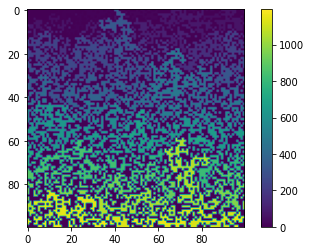

In [1]:
import numpy as np
import matplotlib.pyplot as plt
def R_matrix(L, p): #Создание матрицы из 0 и 1
	return np.random.choice([1, 0], p=(p, 1-p), size=(L, L))
def Find(L, a, b, c, d, Lw): # Поиск элементов в массиве
	x = L[a,b]
	y = L[c,d]
	find_rc = Find_prim(L,x,Lw)
	row = find_rc[0]
	col = find_rc[1]

	for i in range(0,len(col)):
		aa = row[i]
		bb = col[i]
		L[aa,bb] = y #комбинирование элементов
	return L
def Find_prim(a, b, Lw): #Добавление функции find
	size = a.shape
	row = np.array([], dtype=np.int64)
	col = np.array([], dtype=np.int64)
	#if len(b) == 1:
	for i in range(0,Lw):
		for j in range(0,Lw):
			if a[i,j] == b:
				row = np.append(row, i)
				col = np.append(col, j)

	return [[row],[col]]
def Label(L, p): #Cоздание массивов кластеров
	R = R_matrix(L,p)
	iD = 1
	label = np.zeros((L,L))
	for i in range(0,L):
		for j in range(0,L):
			if R[i,j]:
				l_a = Above_left(i,j,R)
				above = l_a[0]
				left = l_a[1]

				if left == 0 and above == 0:
					label[i,j] = iD
					iD = iD + 1
				elif left != 0 and above == 0:
					label[i,j] = label[i,j-1]
				elif left == 0 and above != 0:
					label[i,j] = label[i-1,j]
				else:
					Lab_prim = Find(label,i,j-1,i-1,j,L)
					label = Lab_prim
					label[i,j] = label[i-1,j]
	return label
def Above_left(i, j, R): #Дополнение функции find проверка ячеек на совпадение кластеров с предыдущими
	if i > 0 and j > 0:
		above = R[i-1,j]
		left = R[i,j-1]
	elif i > 0 and j == 0:
		above = R[i-1,j]
		left = 0
	elif i == 0 and j > 0:
		above = 0
		left = R[i,j-1]
	else:
		above = 0
		left = 0
	return (above,left)

def main():
	Lw = int(input())
	p = np.random.rand()
	L = Label(Lw,p)
	print(L)
	plt.imshow(L)
	plt.colorbar()
	plt.show()

main()

In [25]:
import numpy as np
print("Enter the number of columns and rows:")
L = int(input())
Grid = np.array([[int(input()) for x in range(L)] for y in range(L)], int)
Grid

Enter the number of columns and rows:


array([[3, 3, 3],
       [3, 3, 3],
       [3, 3, 3]])